In [ ]:
# (Partial) Implementation of Barmatz and Collas 1985, 
# "Acoustic radiation potential on a sphere in plane, cylindrical, and spherical standing wave fields"

In [54]:
import sympy as sp
import sympy.physics.vector as vec
from sympy.physics.vector import ReferenceFrame
from sympy import symbols
from numpy import linspace
from sympy import lambdify
from sympy import I as j
from sympy import re, im
from sympy import sin, cos, tan, pi, Pow
from sympy.plotting import plot3d
import matplotlib.pyplot as mpl

from sympy.physics.mechanics import *
init_vprinting()

In [23]:
from sympy.physics.vector import ReferenceFrame
W = ReferenceFrame('W')
t, rho, R, c = symbols('t rho R c')
f_1, f_2 = symbols('f_1 f_2')
v_0 = symbols('v_0')
p_in, v_in = symbols('p_in v_in')

rho_s, c_s = symbols('rho_s c_s')
#phi = symbols('phi')

f_1 = (1 - rho*c**2) / (rho_s*c_s**2)
f_2 = (2*(rho_s - rho)) / (2*rho_s + rho)

#Gorkov
#p_in = -rho*sp.diff(phi, t)
#v_in = vec.gradient(phi, W)
#U = (2*pi*R**3)*( (p_in**2 / (3*rho*c**2))*f_1 - (rho*v_in**2 / 2)*f_2 )
#U

In [40]:
x, y, z = symbols('x y z')
n_x, n_y, n_z = symbols('n_x n_y n_z')
l_x, l_y, l_z = symbols('l_x l_y l_z')
k_x = pi*n_x / l_x
k_y = pi*n_y / l_y
k_z = pi*n_z / l_z
k = (k_x + k_y + k_z)**(1/2)

k
# k = (w/c), therefore w = k*c

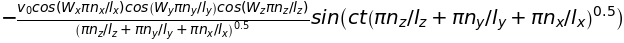

In [41]:
phi = -(v_0 / k)*cos(k_x*W[0])*cos(k_y*W[1])*cos(k_z*W[2])*sin(k*c*t)
phi

In [42]:
p_in = -rho*sp.diff(phi, t)
p_in

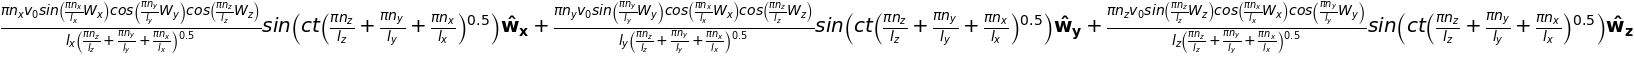

In [43]:
v_in = vec.gradient(phi, W)
v_in

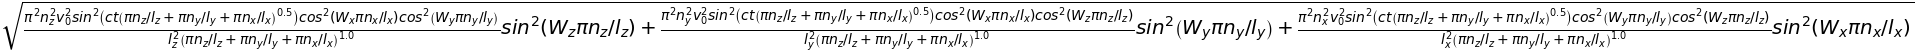

In [44]:
#v_in.subs({W[0]: x, W[1]: y, W[2]: z})
v_in.magnitude()

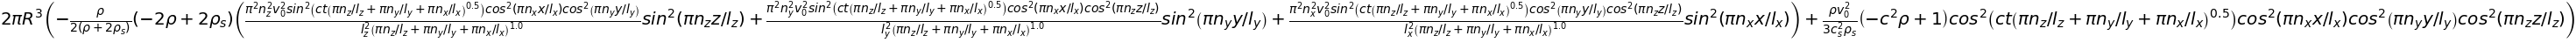

In [52]:
#Pow(p_in, 2) Pow(v_in, 2)
U = ( (2*pi*R**3)*( (Pow(p_in, 2) / (3*rho*c**2))*f_1 - (rho*Pow(v_in.magnitude(), 2) / 2)*f_2 ) )
U = U.subs({W[0]: x, W[1]: y, W[2]: z})
U

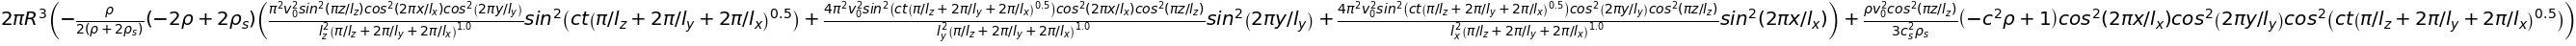

In [66]:
U_221 = U.subs({n_x:2, n_y:2, n_z:1})
U_221

In [67]:
U_221.free_symbols

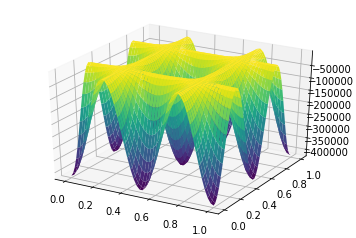

In [68]:
plug_in = {
    R:0.01,
    c:1500,
    c_s:150,
    l_x:1,
    l_y:1,
    l_z:1,
    rho:200,
    rho_s:5,
    t:0,
    v_0:500,
    z:1
}
plot3d(U_221.subs(plug_in), (x, 0, 1), (y, 0, 1))